VIRGINIA COVID-19 STATS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dates = ['3/7', '3/8', '3/9', '3/10', '3/11', '3/12', '3/13', '3/14', '3/15', '3/16', '3/17', '3/18', '3/19', '3/20', 
         '3/21', '3/22', '3/23', '3/24', '3/25', '3/26', '3/27', '3/28', '3/29', '3/30', '3/31', 
         '4/1', '4/2', '4/3', '4/4', '4/5', '4/6', '4/7', '4/8', '4/9', '4/10',
         '4/11', '4/12', '4/13', '4/14', '4/15', '4/16', '4/17', '4/18', '4/19', '4/20', 
         '4/21', '4/22', '4/23', '4/24', '4/25', '4/26', '4/27']

In [3]:
new_reports_per_day = [1, 1, 3, 3, 1, 8, 13, 11, 4, 6, 15, 10, 16, 22, 39, 69, 32, 36, 101, 69, 144, 135, 151, 130, 230, 234, 222, 306, 395, 230, 241, 455, 312, 397, 467, 568, 
                       197, 473, 424, 329, 389, 602, 562, 484, 453, 640, 636, 732, 596, 772, 604, 565]

In [4]:
new_hosp_per_day = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 19, 6, 7, 6, 7, 14, 6, 18, 16, 13, 24, 29, 43, 38, 
                    66, 78, 41, 66, 66, 52, 70, 87, 65, 35, 31, 75, 70, 66, 107, 75, 126, 78, 81, 78, 94, 84, 105, 72, 52]

In [5]:
new_tests_per_day = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1923, 867, 547, 357, 776, 900, 819, 1148, 1829, 
                     1443, 1429, 1363, 1943, 2245, 1416, 2547, 2119, 850, 4124, 2000, 2381, 2433, 2540, 1986, 1416, 1362, 1406, 2275, 2553, 2934, 2802, 2002, 1619, 2424, 3740,
                     4497, 3163, 3940, 4062]

In [6]:
new_deaths_per_day = [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 4, 0, 2, 0, 5, 3, 5, 3, 2, 7, 7, 5, 5, 0, 3, 9, 12, 34, 12, 9, 11, 8, 5, 41, 13, 23, 27, 19, 23, 24, 25, 
                      23, 38, 26, 12, 10]

In [7]:
FX_new_cases = [1, 1, 0, 0, 0, 2, 2, 4, 0, 0, 2, 2, 1, 1, 6, 9, 12, 3, 31, 3, 45, 32, 31, 37, 20, 43, 40, 44, 15, 39, 62, 44, 38, 120, 87, 169, 62, 156, 43, 91, 77, 101, 
                157, 176, 116, 152, 179, 106, 172, 211, 144, 113]

In [8]:
Virginia_COVID_19 = pd.DataFrame(list(zip(dates, new_reports_per_day, new_hosp_per_day, new_tests_per_day, new_deaths_per_day, FX_new_cases)))

In [9]:
Virginia_COVID_19.columns = ['dates', 'new_reports_per_day', 'new_hosp_per_day', 'new_tests_per_day', 'new_deaths_per_day', 'FX_new_cases']

In [10]:
Virginia_COVID_19['double_rate_cases'] = 70 / (Virginia_COVID_19['new_reports_per_day'].cumsum().pct_change() * 100)

In [11]:
Virginia_COVID_19['double_rate_hosp'] = 70 / (Virginia_COVID_19['new_hosp_per_day'].cumsum().pct_change() * 100)

In [12]:
Virginia_COVID_19['double_rate_test'] = 70 / (Virginia_COVID_19['new_tests_per_day'].cumsum().pct_change() * 100)

In [13]:
Virginia_COVID_19['double_rate_deaths'] = 70 / (Virginia_COVID_19['new_deaths_per_day'].cumsum().pct_change() * 100)

In [14]:
Virginia_COVID_19['double_rate_FX'] = 70 / (Virginia_COVID_19['FX_new_cases'].cumsum().pct_change() * 100)

In [15]:
Virginia_COVID_19.set_index('dates')

,new_reports_per_day,new_hosp_per_day,new_tests_per_day,new_deaths_per_day,FX_new_cases,double_rate_cases,double_rate_hosp,double_rate_test,double_rate_deaths,double_rate_FX
dates,,,,,,,,,,
3/7,1,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN
3/8,1,NaN,NaN,0,1,0.700000,NaN,NaN,NaN,0.700000
3/9,3,NaN,NaN,0,0,0.466667,NaN,NaN,NaN,inf
3/10,3,NaN,NaN,0,0,1.166667,NaN,NaN,NaN,inf
3/11,1,NaN,NaN,0,0,5.600000,NaN,NaN,NaN,inf
3/12,8,NaN,NaN,0,2,0.787500,NaN,NaN,NaN,0.700000
3/13,13,NaN,NaN,0,2,0.915385,NaN,NaN,NaN,1.400000
3/14,11,NaN,NaN,1,4,1.909091,NaN,NaN,0.000000,1.050000
3/15,4,NaN,NaN,0,0,7.175000,NaN,NaN,inf,inf


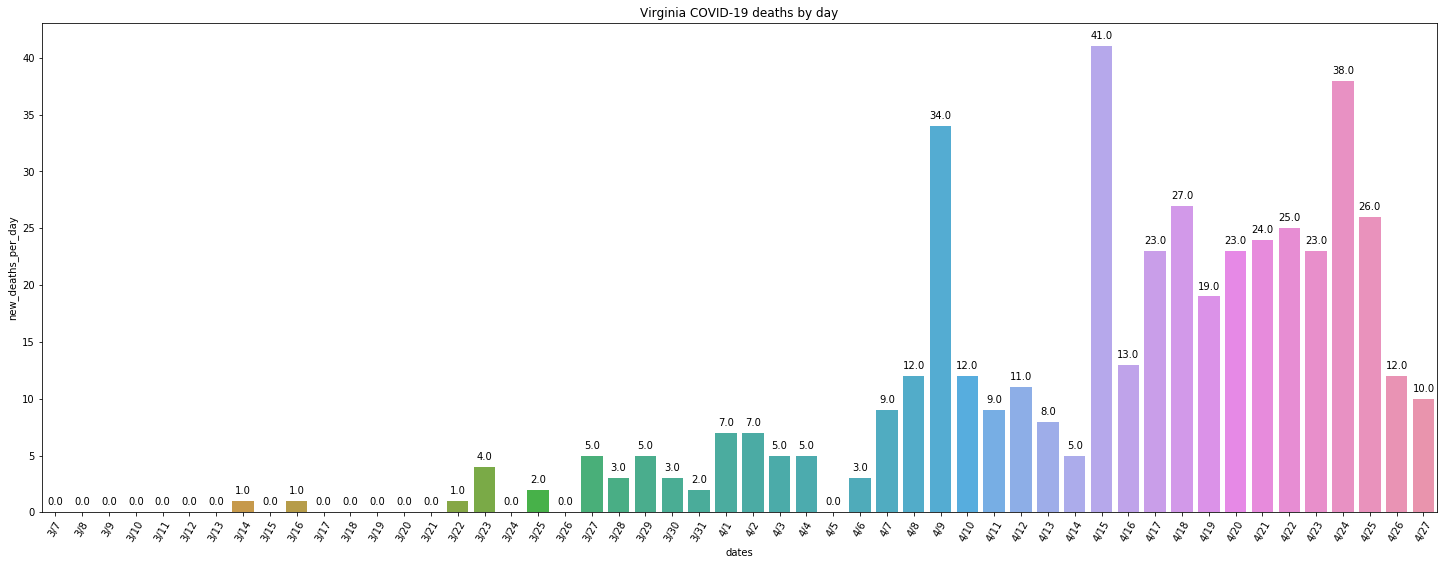

In [16]:
plt.figure(figsize=(25, 9))
death_daily = sns.barplot(x='dates', y='new_deaths_per_day', data=Virginia_COVID_19)
for p in death_daily.patches:
    death_daily.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Virginia COVID-19 deaths by day')
plt.show()

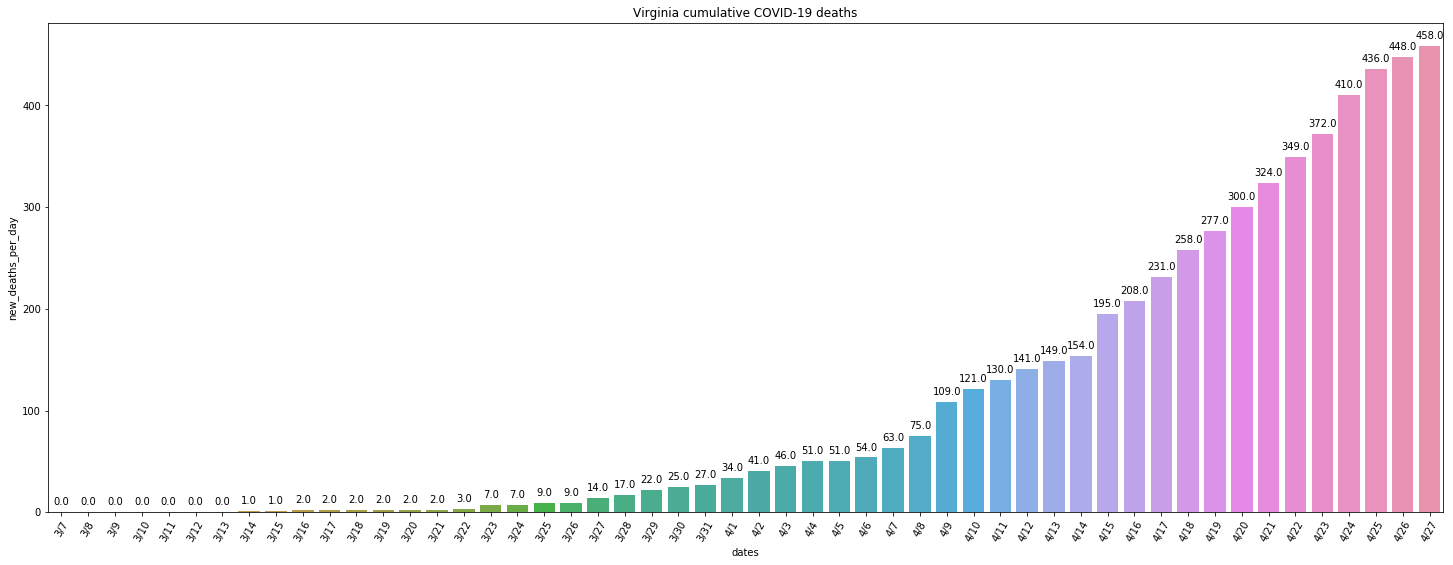

In [17]:
plt.figure(figsize=(25, 9))
death_cum = sns.barplot(x='dates', y=Virginia_COVID_19.new_deaths_per_day.cumsum(), data=Virginia_COVID_19)
for p in death_cum.patches:
    death_cum.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Virginia cumulative COVID-19 deaths')
#plt.savefig('Viginia cumulative COVID-19 deaths as of March 29')
plt.show()

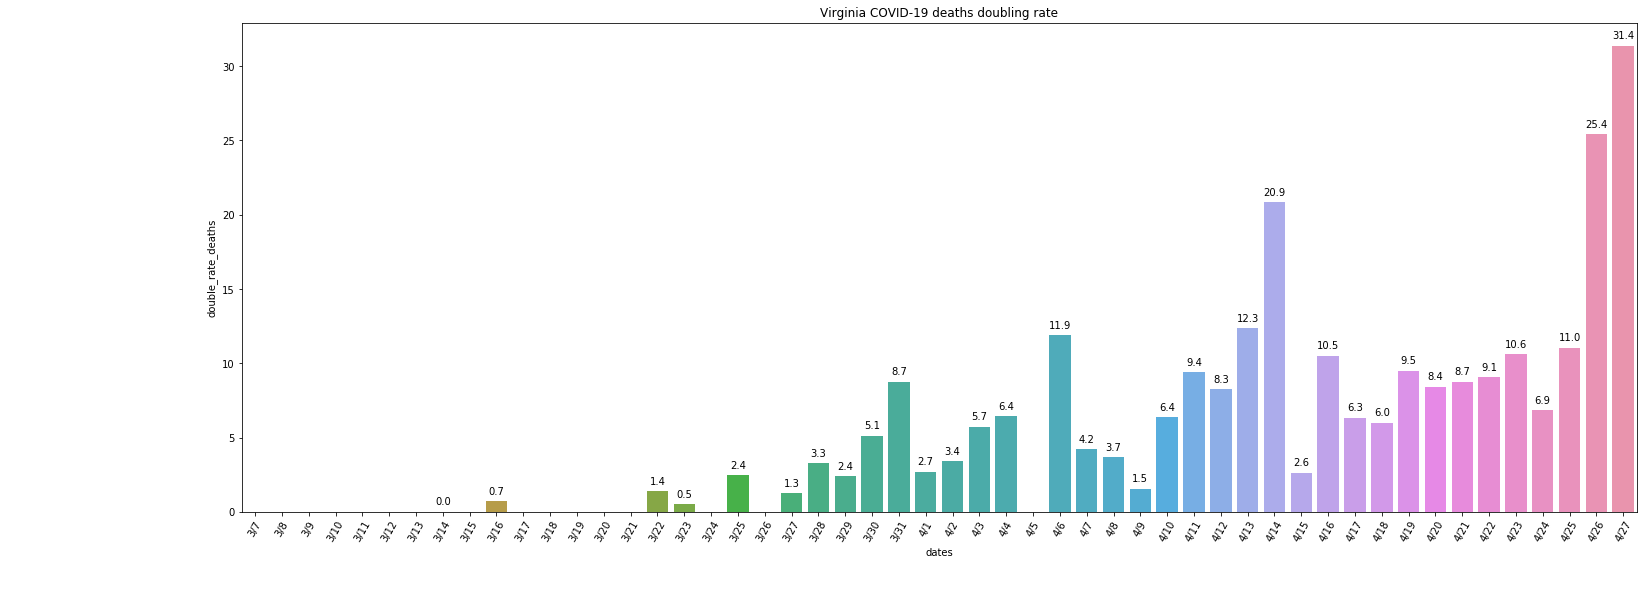

In [18]:
plt.figure(figsize=(25, 9))
VA_deaths_double_rate = sns.barplot(x='dates', y='double_rate_deaths', data=Virginia_COVID_19)
for p in VA_deaths_double_rate.patches:
    VA_deaths_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                                   textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Virginia COVID-19 deaths doubling rate')
plt.show()

In [19]:
print(Virginia_COVID_19['double_rate_deaths'][-7:].mean())

14.732595083025274


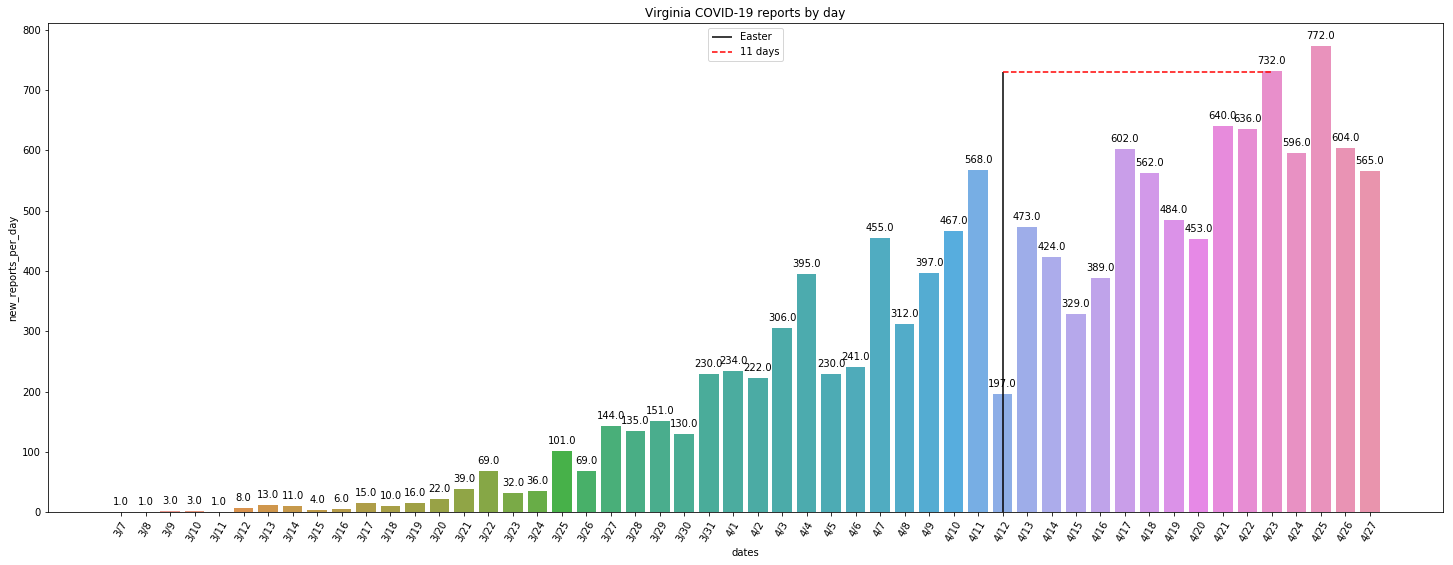

In [20]:
plt.figure(figsize=(25, 9))
reports_daily = sns.barplot(x='dates', y='new_reports_per_day', data=Virginia_COVID_19)
for p in reports_daily.patches:
    reports_daily.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.vlines(x=36, ymin=0, ymax=730, color='k', label='Easter')
plt.hlines(y=730, xmin=36, xmax=47, color='r', linestyle='dashed', label='11 days')
#rolling_average = sns.lineplot(x=Virginia_cases['new_reports_dates'], y='rolling_7_average', data=Virginia_cases, color='k')
plt.legend(loc="upper center")
plt.savefig('Viginia daily COVID-19 reports')
plt.title('Virginia COVID-19 reports by day')
plt.show()

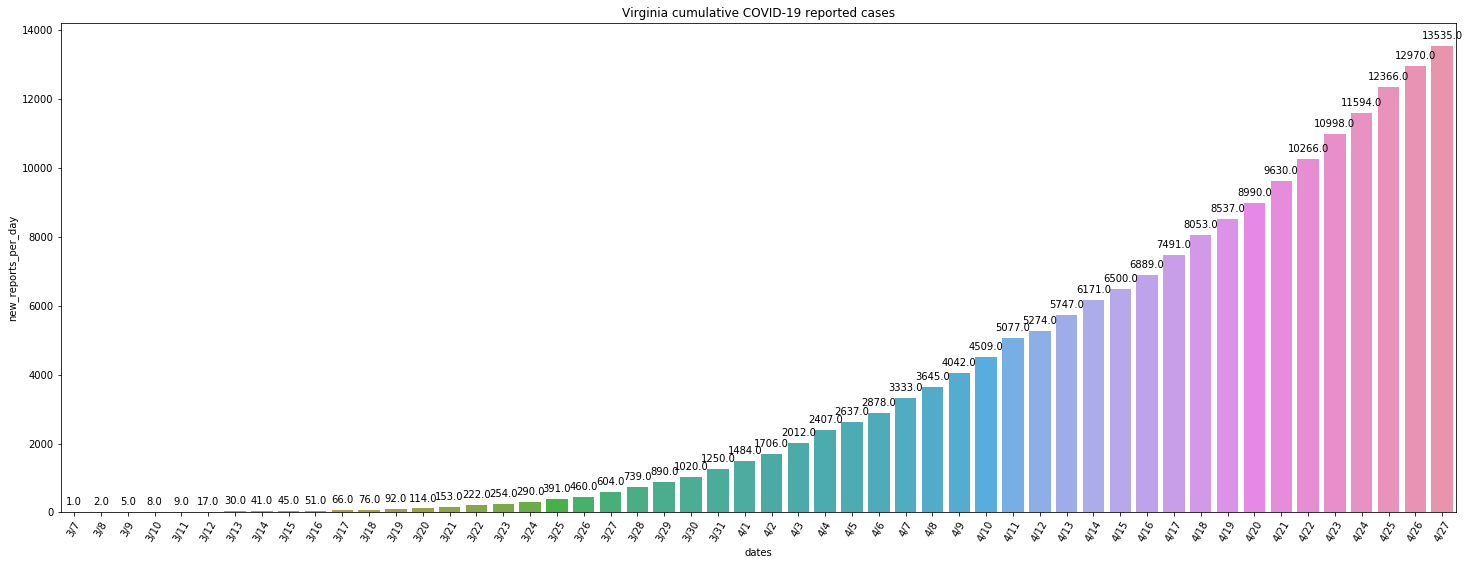

In [21]:
plt.figure(figsize=(25, 9))
cases_plot = sns.barplot(x='dates', y=Virginia_COVID_19.new_reports_per_day.cumsum(), data=Virginia_COVID_19)
for p in cases_plot.patches:
    cases_plot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Virginia cumulative COVID-19 reported cases')
#plt.savefig('Viginia cumulative COVID-19 reports')
plt.show()

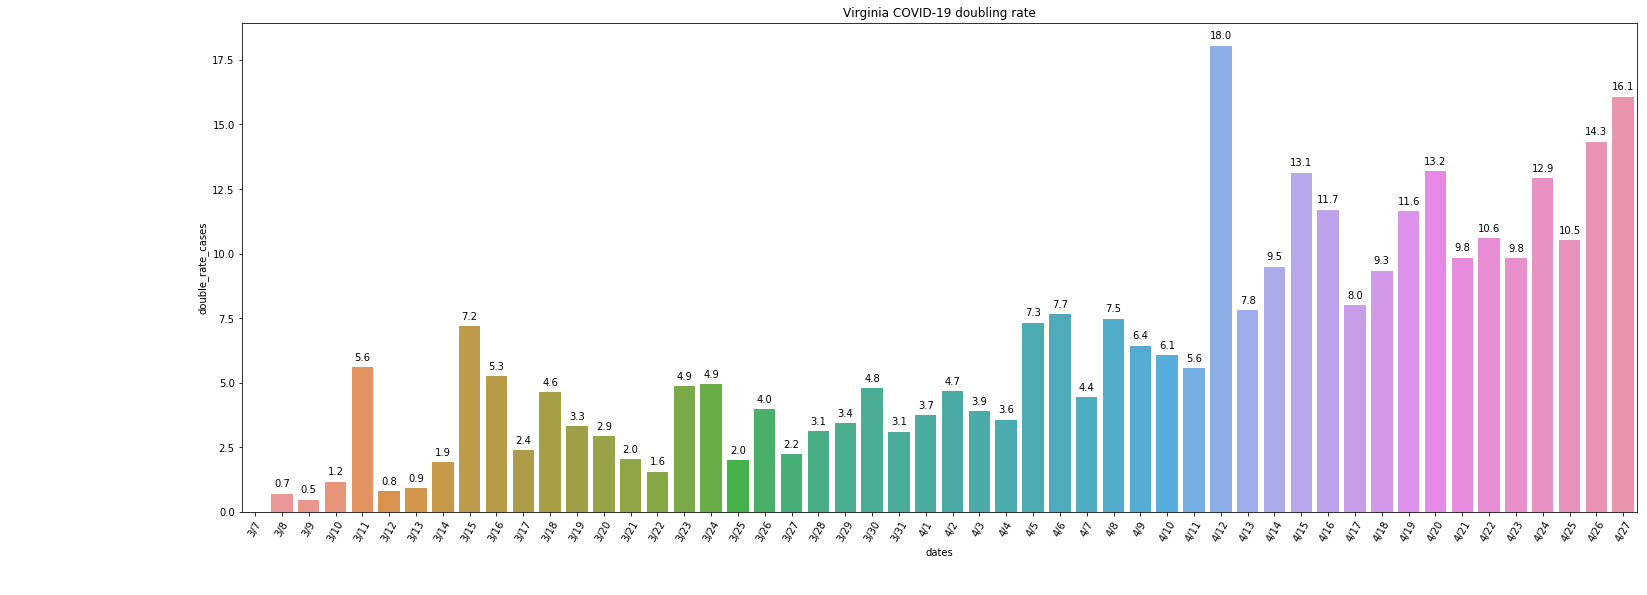

In [22]:
plt.figure(figsize=(25, 9))
VA_cases_double_rate = sns.barplot(x='dates', y='double_rate_cases', data=Virginia_COVID_19)
for p in VA_cases_double_rate.patches:
    VA_cases_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                                  textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Virginia COVID-19 doubling rate')
plt.show()

In [23]:
print(Virginia_COVID_19['double_rate_cases'][-7:].mean())

12.011339159331502


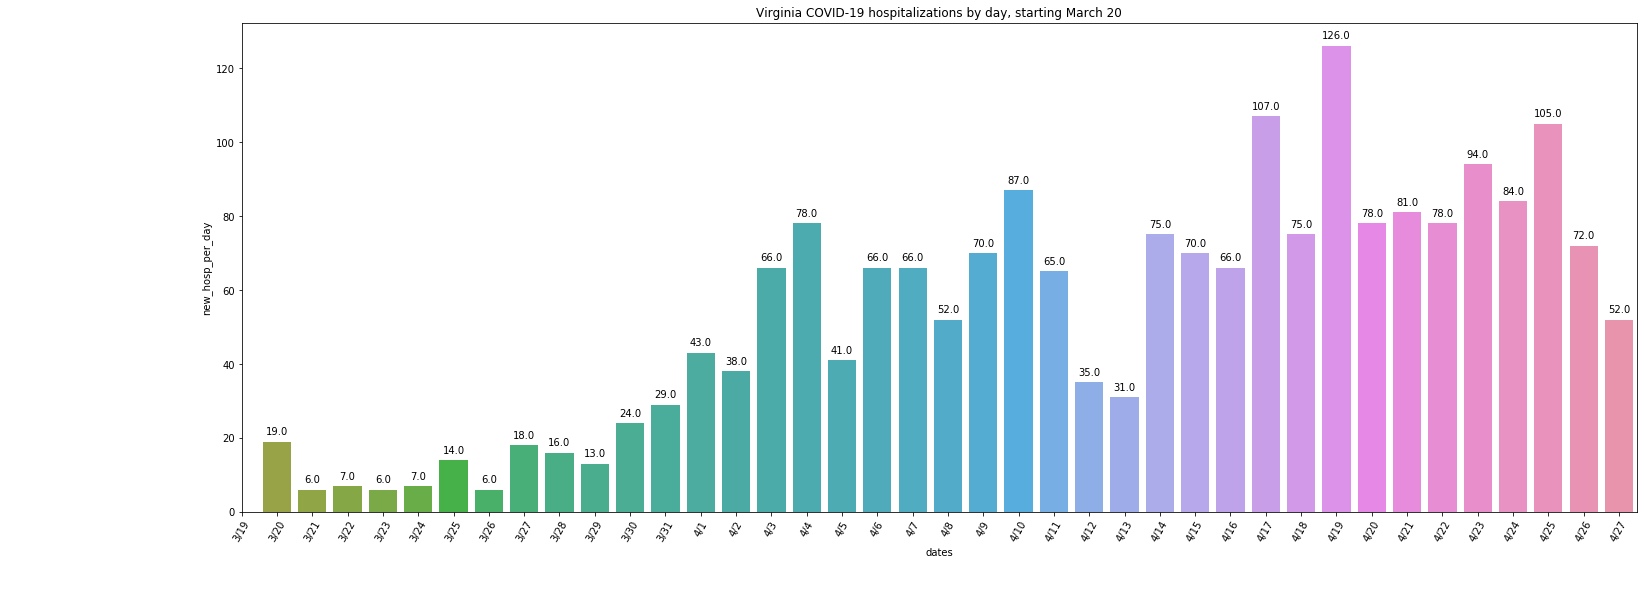

In [24]:
plt.figure(figsize=(25, 9))
hosp_daily = sns.barplot(x='dates', y='new_hosp_per_day', data=Virginia_COVID_19)
for p in hosp_daily.patches:
    hosp_daily.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia COVID-19 hospitalizations by day, starting March 20')
plt.show()

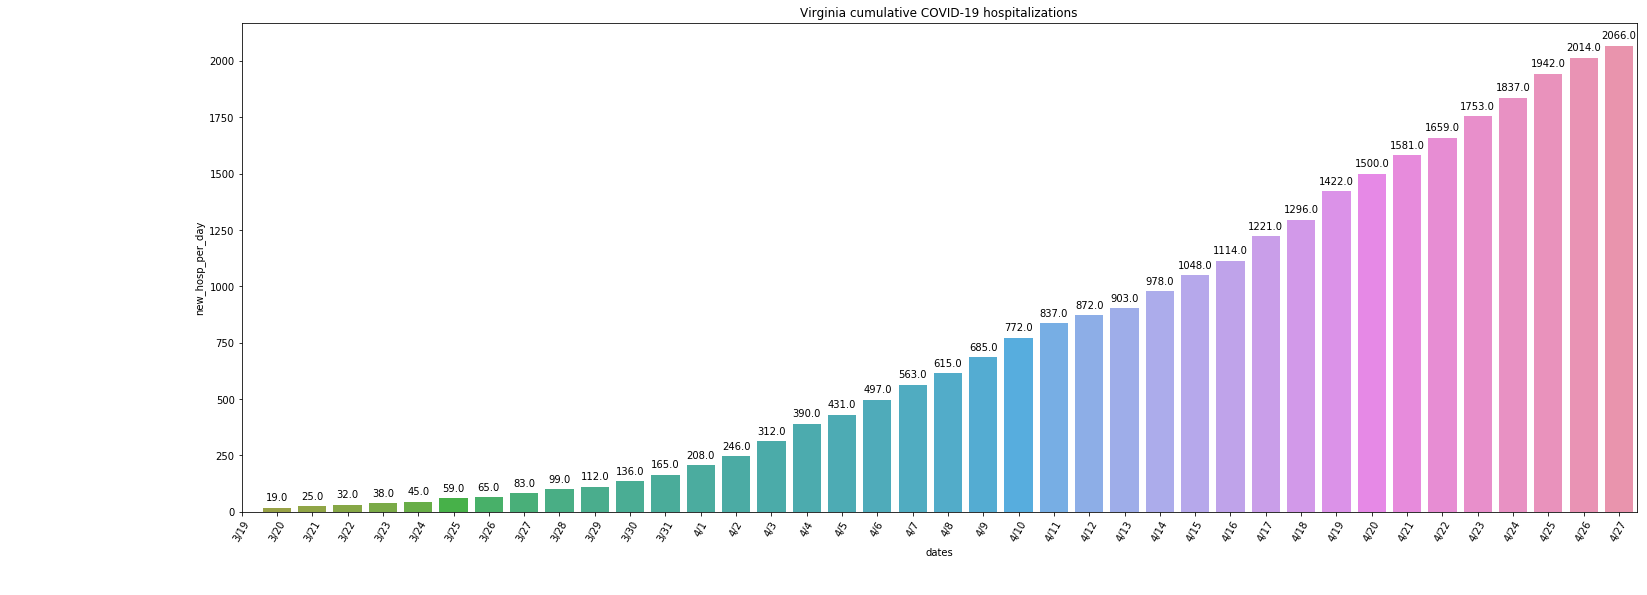

In [25]:
plt.figure(figsize=(25, 9))
hosp_cum = sns.barplot(x='dates', y=Virginia_COVID_19.new_hosp_per_day.cumsum(), data=Virginia_COVID_19)
for p in hosp_cum.patches:
    hosp_cum.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia cumulative COVID-19 hospitalizations')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

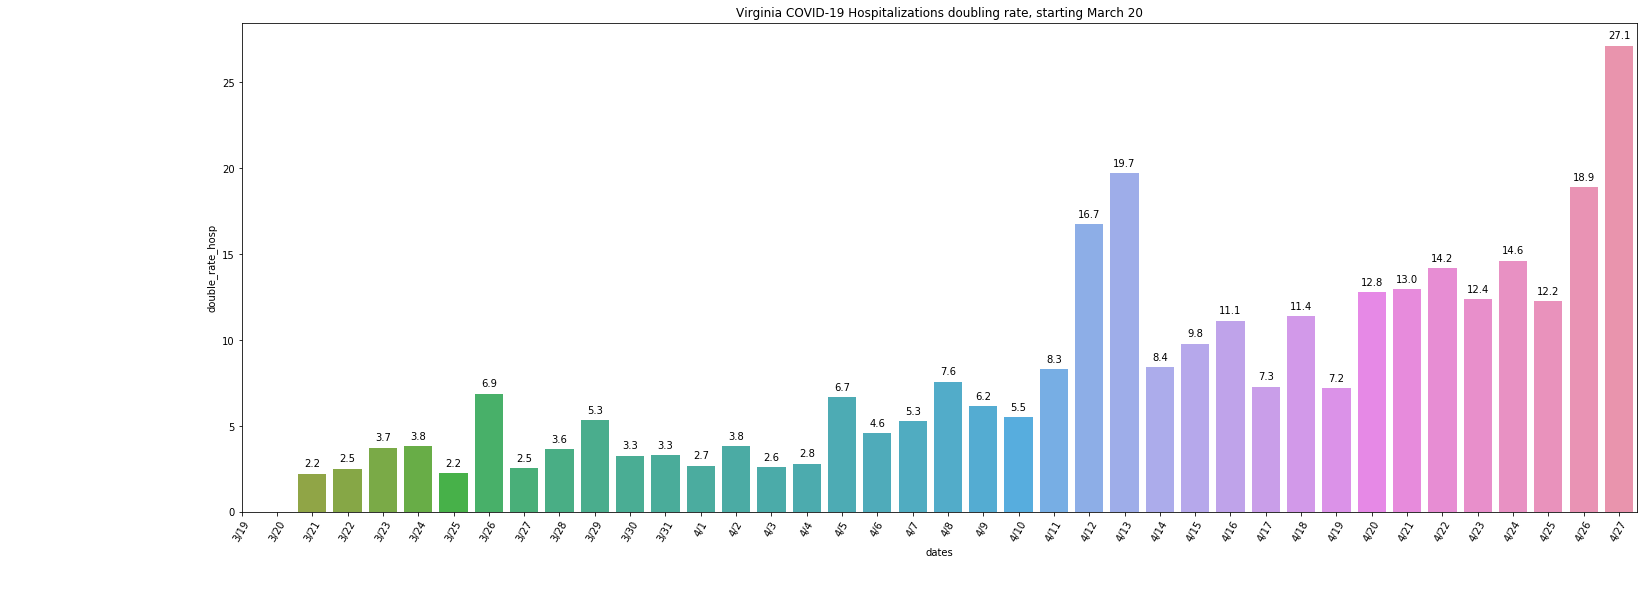

In [26]:
plt.figure(figsize=(25, 9))
hosp_double_rate = sns.barplot(x='dates', y='double_rate_hosp', data=Virginia_COVID_19)
for p in hosp_double_rate.patches:
    hosp_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia COVID-19 Hospitalizations doubling rate, starting March 20')
plt.show()

In [27]:
print(Virginia_COVID_19['double_rate_hosp'][-7:].mean())

16.0503962625239


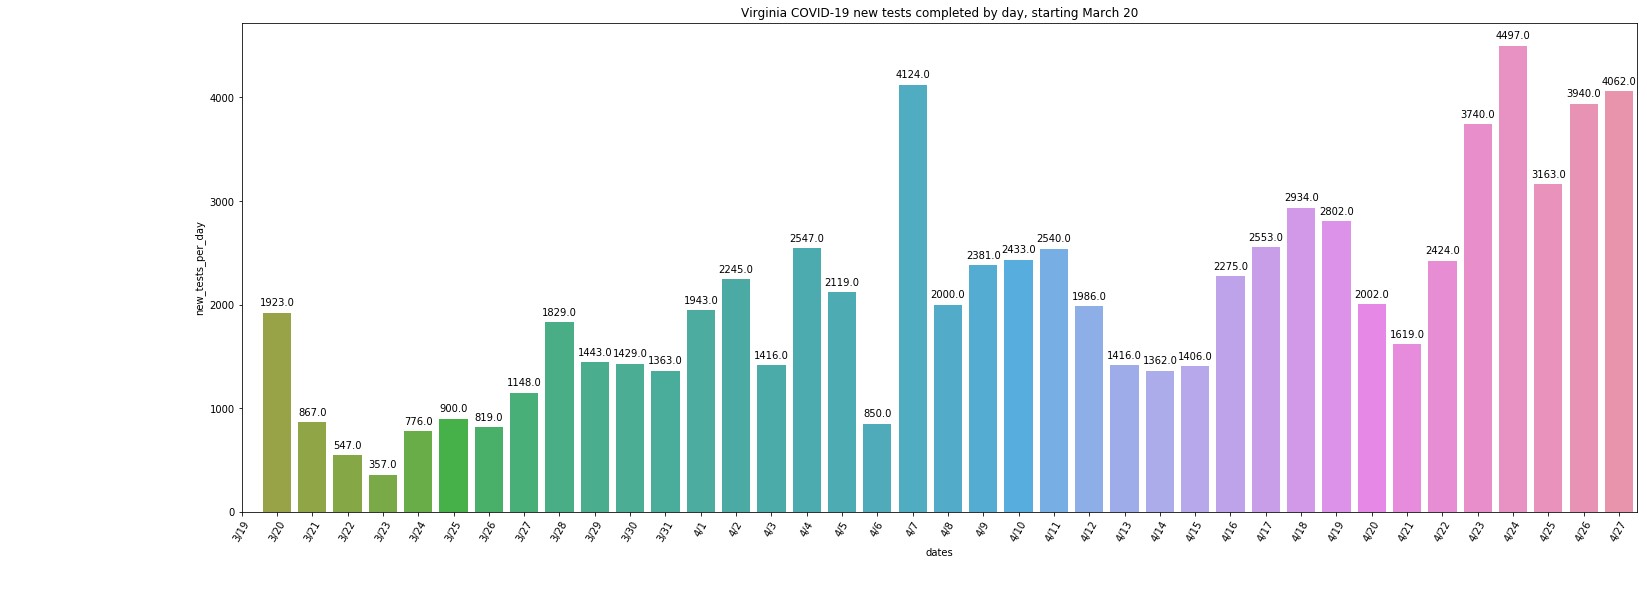

In [28]:
plt.figure(figsize=(25, 9))
tests_daily = sns.barplot(x='dates', y='new_tests_per_day', data=Virginia_COVID_19)
for p in tests_daily.patches:
    tests_daily.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia COVID-19 new tests completed by day, starting March 20')
plt.show()

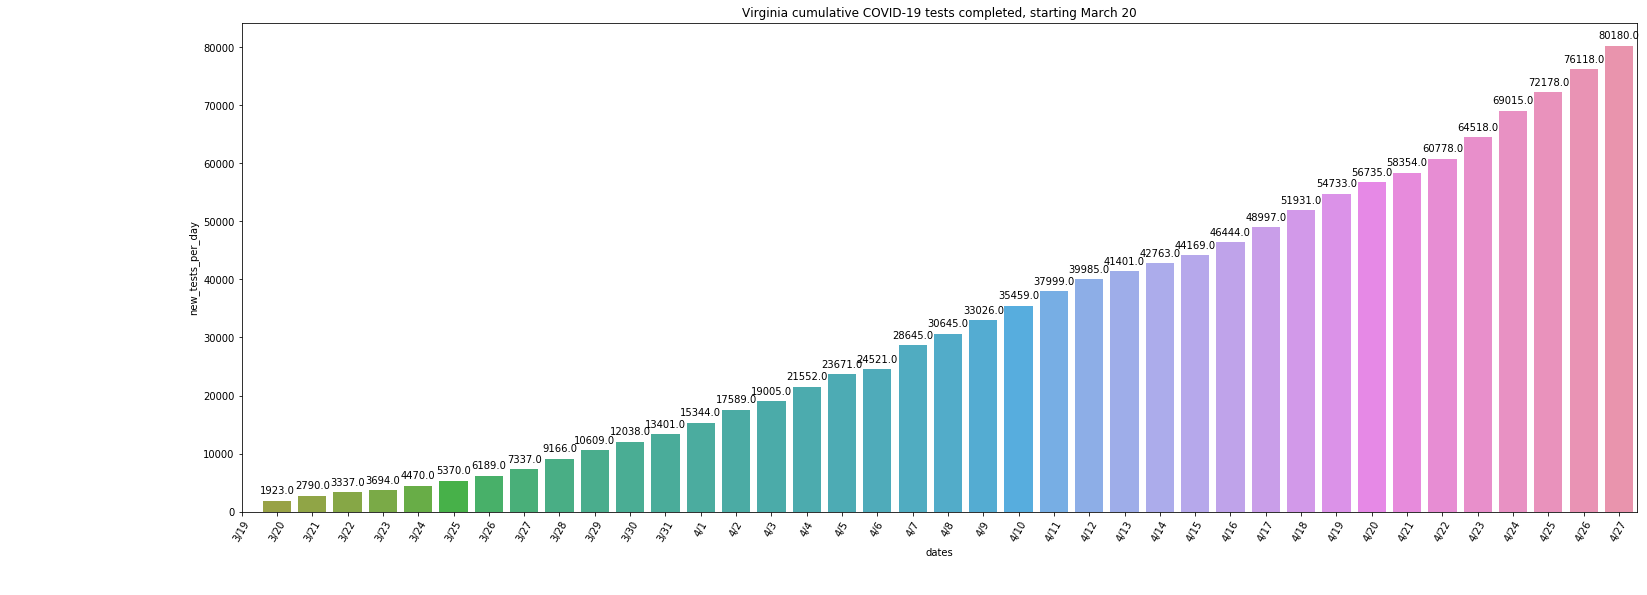

In [29]:
plt.figure(figsize=(25, 9))
tests_cum = sns.barplot(x='dates', y=Virginia_COVID_19.new_tests_per_day.cumsum(), data=Virginia_COVID_19)
for p in tests_cum.patches:
    tests_cum.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia cumulative COVID-19 tests completed, starting March 20')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

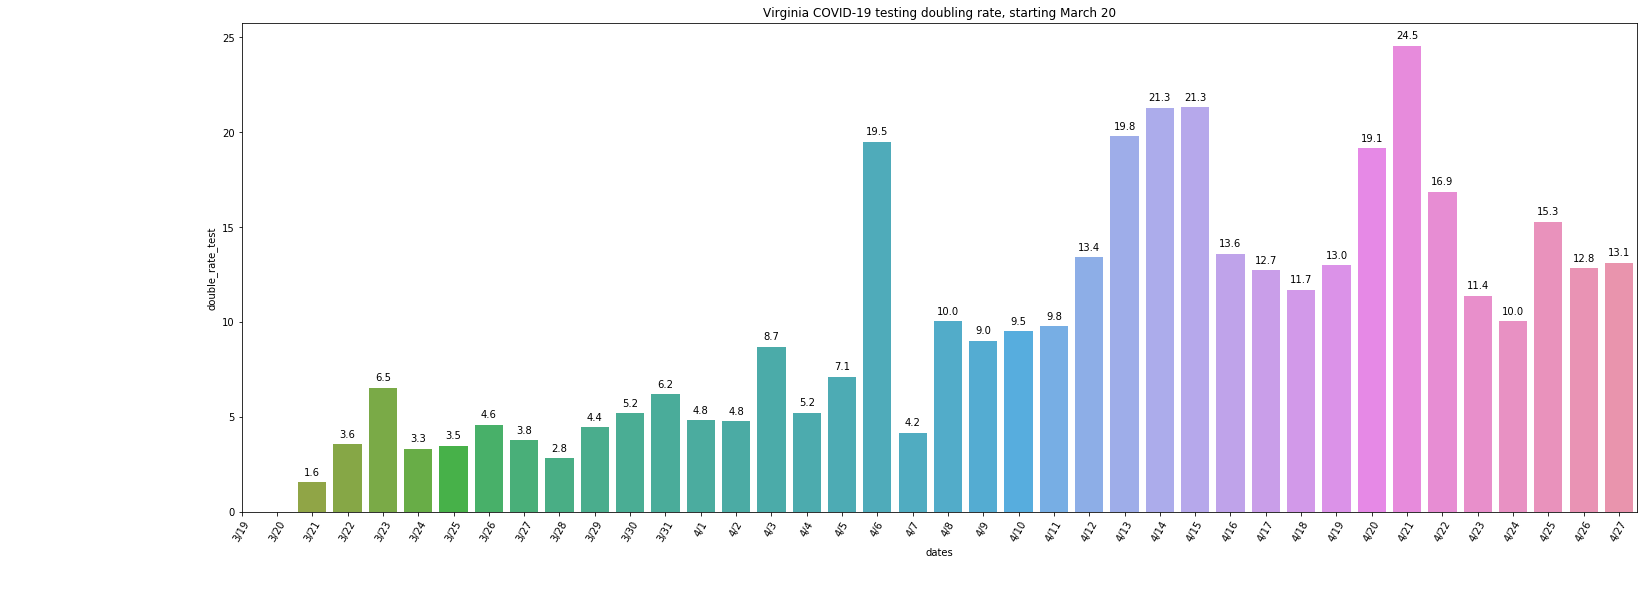

In [30]:
plt.figure(figsize=(25, 9))
tests_double_rate = sns.barplot(x='dates', y='double_rate_test', data=Virginia_COVID_19)
for p in tests_double_rate.patches:
    tests_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                               textcoords='offset points')
plt.xticks(rotation=60)
plt.xlim(12)
plt.title('Virginia COVID-19 testing doubling rate, starting March 20')
plt.show()

In [31]:
print(Virginia_COVID_19['double_rate_test'][-7:].mean())

14.85921783074133


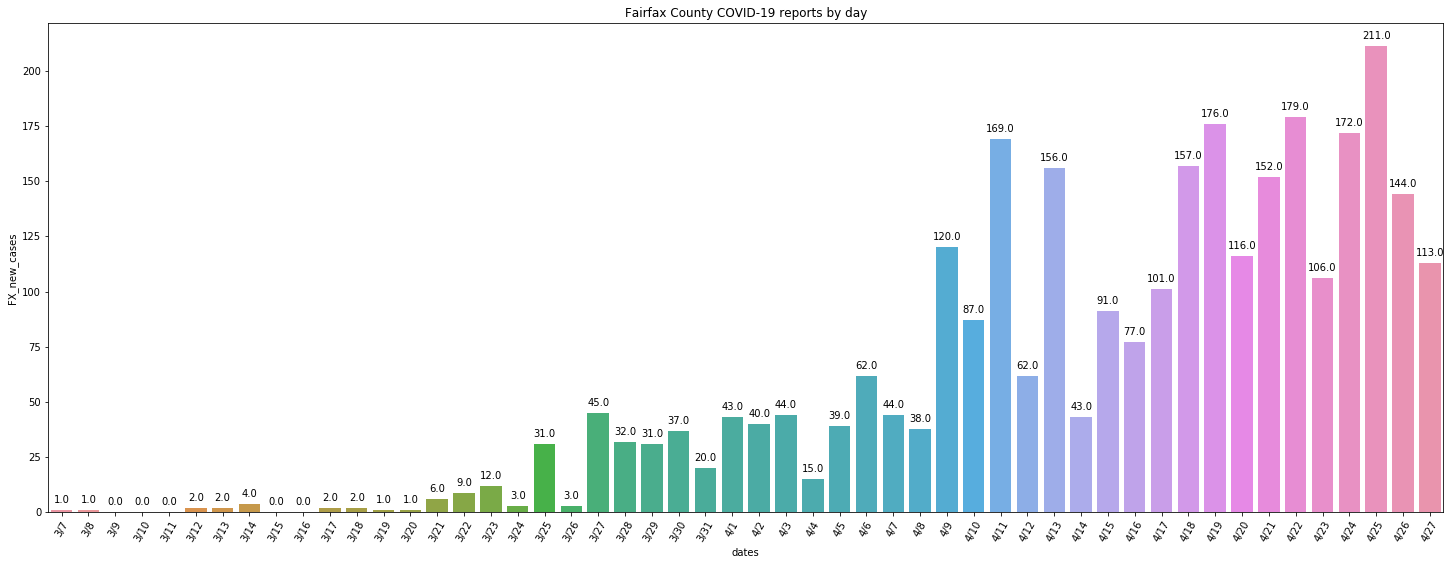

In [32]:
plt.figure(figsize=(25, 9))
FX_reports_daily = sns.barplot(x='dates', y='FX_new_cases', data=Virginia_COVID_19)
for p in FX_reports_daily.patches:
    FX_reports_daily.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), 
                              textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Fairfax County COVID-19 reports by day')
plt.show()

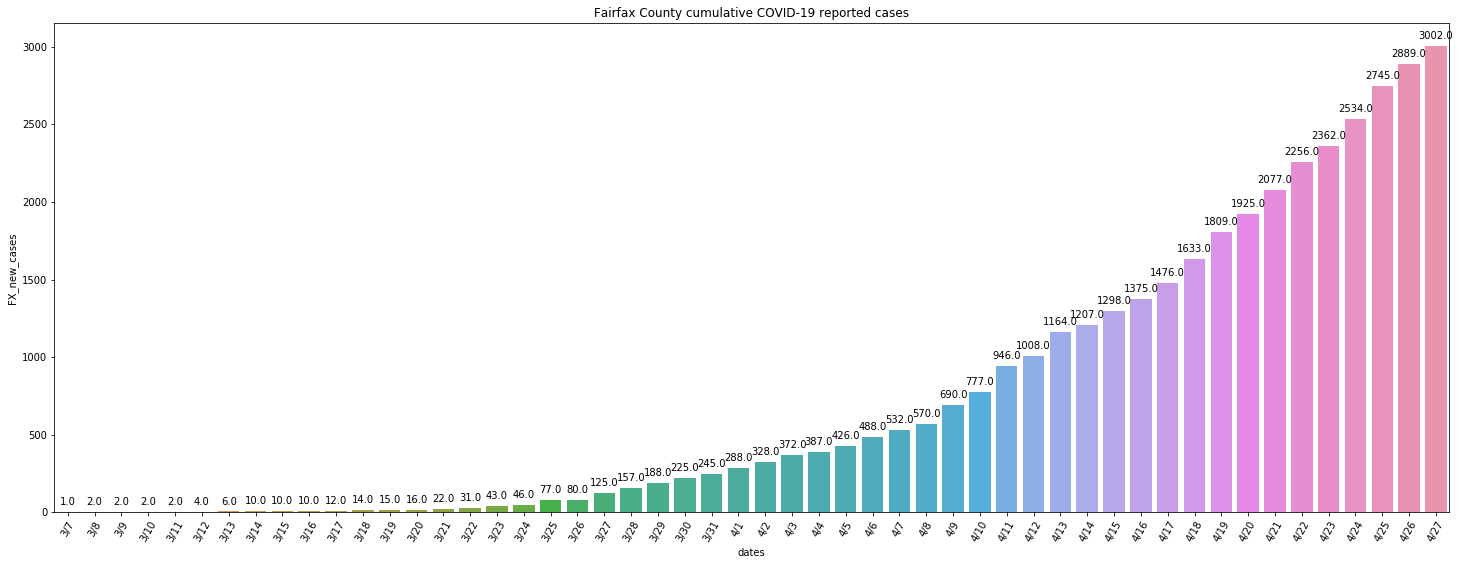

In [33]:
plt.figure(figsize=(25, 9))
FX_reports_cum = sns.barplot(x='dates', y=Virginia_COVID_19.FX_new_cases.cumsum(), data=Virginia_COVID_19)
for p in FX_reports_cum.patches:
    FX_reports_cum.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Fairfax County cumulative COVID-19 reported cases')
#plt.savefig('Viginia cumulative COVID-19 reports as of March 30')
plt.show()

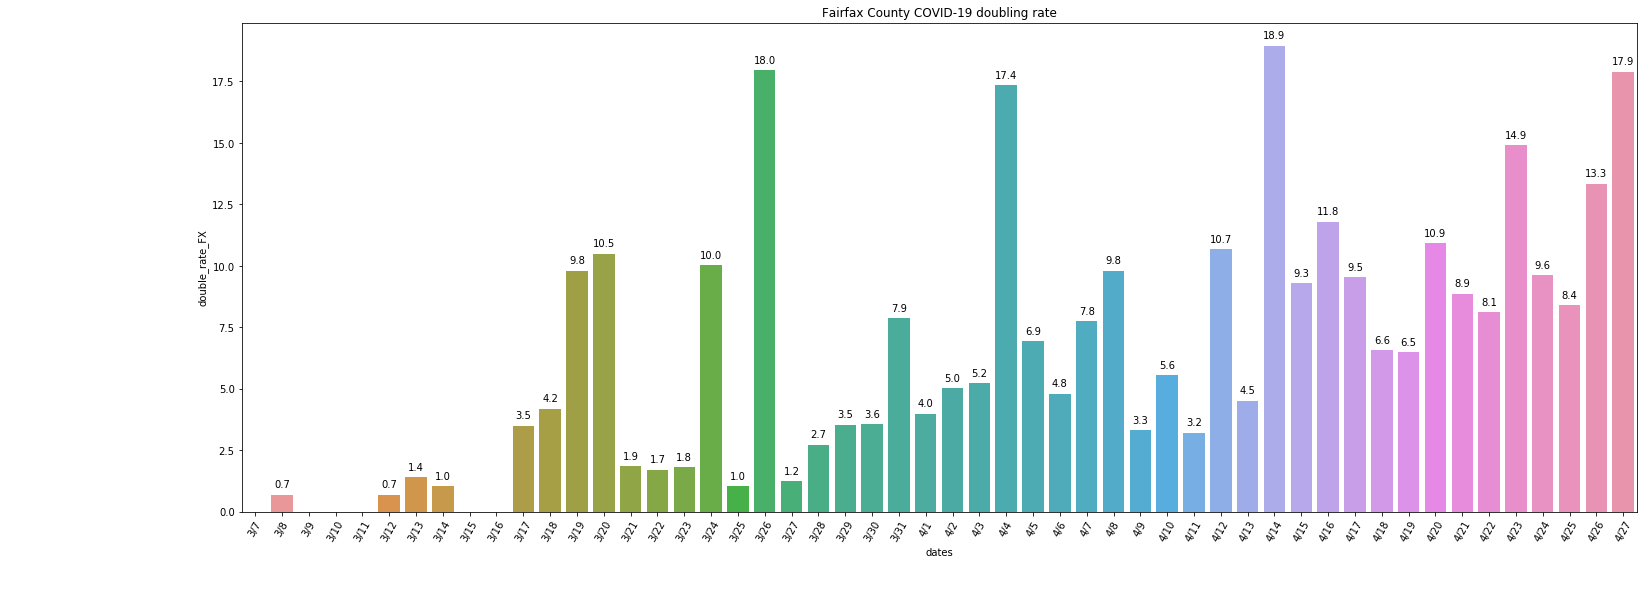

In [34]:
plt.figure(figsize=(25, 9))
FX_double_rate = sns.barplot(x='dates', y='double_rate_FX', data=Virginia_COVID_19)
for p in FX_double_rate.patches:
    FX_double_rate.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.xticks(rotation=60)
plt.title('Fairfax County COVID-19 doubling rate')
plt.show()

In [35]:
print(Virginia_COVID_19['double_rate_FX'][-7:].mean())

11.592175300137884
